In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

(1681, 1121, 3) 0


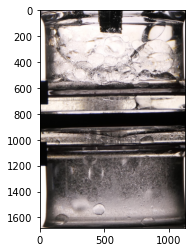

In [2]:
img = image.load_img('E:/Python Projekt 5_2 Extraktion/Training_Validation/Flooding/Flooding_0001.png', 0)
plt.imshow(img)
print(cv2.imread('E:/Python Projekt 5_2 Extraktion/Training_Validation/Flooding/Flooding_0001.png').shape, 0)
img_height = 120
img_width = 80
batch_size = 16
#new resize
#use full height and width for better accuracy

In [3]:
ds_train_grey = tf.keras.preprocessing.image_dataset_from_directory('E:/Python Projekt 5_2 Extraktion/Dataset_split/Train',color_mode="grayscale", batch_size = batch_size,
                                                              image_size = (img_height, img_width),seed = 123)
ds_validation_grey = tf.keras.preprocessing.image_dataset_from_directory('E:/Python Projekt 5_2 Extraktion/Dataset_split/Validation',color_mode="grayscale", batch_size = batch_size,
                                                              image_size = (img_height, img_width),seed = 123)
#ändern des Pfades nötig

Found 3094 files belonging to 2 classes.
Found 1031 files belonging to 2 classes.


['Flooding', 'Regular_State']


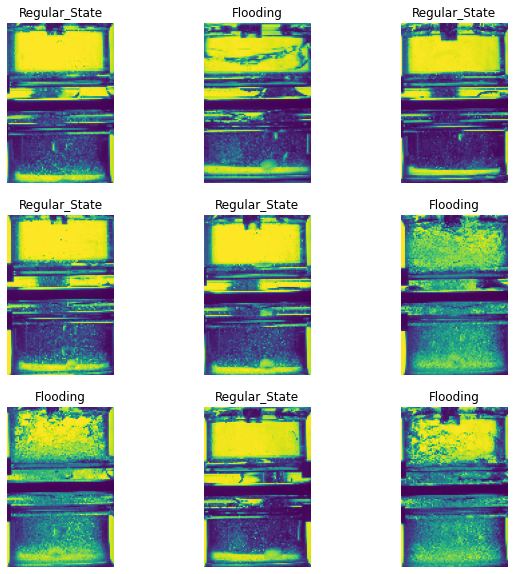

In [4]:
class_names = ds_train_grey.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in ds_train_grey.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
num_classes = 2
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.AveragePooling2D(12,12, input_shape = (img_height, img_width, 1)),
  layers.Conv2D(16,6, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(num_classes)
])
#https://www.tensorflow.org/tutorials/images/classification
#https://keras.io/api/layers/convolution_layers/convolution2d/
#padding =  "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 120, 80, 1)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d (Conv2D)              (None, 10, 6, 16)         592       
_________________________________________________________________
flatten (Flatten)            (None, 960)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1922      
Total params: 2,514
Trainable params: 2,514
Non-trainable params: 0
_________________________________________________________________


In [8]:
epochs=3
model.fit(
  x = ds_train_grey,
  validation_data=ds_validation_grey,
  epochs=epochs
)


Epoch 1/3
194/194 [==============================] - 155s 799ms/step - loss: 0.4401 - accuracy: 0.7948 - val_loss: 0.0794 - val_accuracy: 1.0000
Epoch 2/3
194/194 [==============================] - 155s 796ms/step - loss: 0.2789 - accuracy: 0.8772 - val_loss: 0.0721 - val_accuracy: 0.9971
Epoch 3/3
194/194 [==============================] - 154s 795ms/step - loss: 0.2093 - accuracy: 0.9202 - val_loss: 0.0338 - val_accuracy: 1.0000


In [10]:
ds_test_grey = tf.keras.preprocessing.image_dataset_from_directory('E:/Python Projekt 5_2 Extraktion/Dataset_split/Test',color_mode="grayscale", batch_size = batch_size,
                                                              image_size = (img_height, img_width),seed = 123)
model.evaluate(ds_test_grey)
# evaluate with not seen test data. Test data is in a different folder  training, validierung, test :60/20/20

Found 1033 files belonging to 2 classes.
65/65 [==============================] - 33s 508ms/step - loss: 0.4914 - accuracy: 0.7880


[0.4914461672306061, 0.7879961133003235]